Data Science/ Analytics Intern – Round-0 Assignment
(Trader Performance vs Market Sentiment)

Objective
Analyze how market sentiment (Fear/Greed) relates to trader behavior and performance on Hyperliquid. 
Your goal is to uncover patterns that could inform smarter trading strategies.

Tasks (What to do)
Part A — Data preparation (must-have)


1. Load both datasets and document:
a) number of rows/columns
b) missing values / duplicates


In [3]:
import pandas as pd

In [4]:
Historical_data = pd.read_csv("C:/Users/vibha/Downloads/historical_data.csv")

In [5]:
fear_greed = pd.read_csv("C:/Users/vibha/Downloads/fear_greed_index.csv")

In [7]:
Historical_data.shape

(211224, 16)

In [8]:
fear_greed.shape

(2644, 4)

missing values / duplicates

In [10]:
Historical_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [12]:
fear_greed.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [14]:
Historical_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
211219    False
211220    False
211221    False
211222    False
211223    False
Length: 211224, dtype: bool

In [15]:
fear_greed.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2639    False
2640    False
2641    False
2642    False
2643    False
Length: 2644, dtype: bool

In [19]:
import pandas as pd

df = pd.read_csv("C:/Users/vibha/Downloads/historical_data.csv")

Historical_data['Timestamp IST'] = pd.to_datetime(Historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M')


In [21]:
Historical_data['date'] = Historical_data['Timestamp IST'].dt.floor('D')
Historical_data['date']

0        2024-12-02
1        2024-12-02
2        2024-12-02
3        2024-12-02
4        2024-12-02
            ...    
211219   2025-04-25
211220   2025-04-25
211221   2025-04-25
211222   2025-04-25
211223   2025-04-25
Name: date, Length: 211224, dtype: datetime64[ns]

In [25]:
Historical_data['date'] = pd.to_datetime(Historical_data['date'])
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

In [28]:
merged_df = pd.merge(Historical_data, fear_greed, on='date', how='left')
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed


1) Daily PnL per Trader

In [31]:
daily_pnl = Historical_data.groupby(['Trade ID', 'date'])['Closed PnL'].sum().reset_index()
daily_pnl

,Trade ID,date,Closed PnL
0,0.000000e+00,2023-05-01,0.000000
1,0.000000e+00,2024-07-24,0.000000
2,0.000000e+00,2024-07-25,0.000000
3,0.000000e+00,2024-07-26,0.000000
4,0.000000e+00,2024-07-27,0.000000
...,...,...,...
114808,1.130000e+15,2025-04-25,-1.215550
114809,1.130000e+15,2025-04-26,-5.211149
114810,1.130000e+15,2025-04-28,2.059221
114811,1.130000e+15,2025-04-29,474.166080


2) win rate, average trade size

In [32]:
win_rate = (Historical_data['Closed PnL'] > 0).mean() * 100

In [36]:
win_rate_trader = Historical_data.groupby('Trade ID')['Closed PnL'].apply(lambda x: (x > 0).mean()*100)
win_rate_trader

Trade ID
0.000000e+00     0.000000
2.367595e+09     0.000000
3.739256e+09     0.000000
9.506002e+09     0.000000
1.162660e+10     0.000000
                  ...    
1.090000e+15    42.238648
1.100000e+15    42.246265
1.110000e+15    41.009464
1.120000e+15    39.979445
1.130000e+15    50.276243
Name: Closed PnL, Length: 2810, dtype: float64

Average Trade Size

In [38]:
avg_trade_size = fear_greed['value'].mean()
avg_trade_size

46.981089258698944

leverage distribution

Since leverage cannot be computed, I'm using:

🔹 Size USD → As a proxy for exposure distribution

In [39]:
df['Size USD'].describe()

count    2.112240e+05
mean     5.639451e+03
std      3.657514e+04
min      0.000000e+00
25%      1.937900e+02
50%      5.970450e+02
75%      2.058960e+03
max      3.921431e+06
Name: Size USD, dtype: float64

number of trades per day

In [40]:
trades_per_day = Historical_data.groupby('date').size().reset_index(name='number_of_trades')
print(trades_per_day)

          date  number_of_trades
0   2023-05-01                 3
1   2023-12-05                 9
2   2023-12-14                11
3   2023-12-15                 2
4   2023-12-16                 3
..         ...               ...
475 2025-04-27               337
476 2025-04-28              1379
477 2025-04-29              2243
478 2025-04-30              1113
479 2025-05-01              1230

[480 rows x 2 columns]


long/short ratio

In [41]:
print(df['Side'].unique())
print(df['Direction'].unique())

['BUY' 'SELL']
['Buy' 'Sell' 'Open Long' 'Close Long' 'Spot Dust Conversion' 'Open Short'
 'Close Short' 'Long > Short' 'Short > Long' 'Auto-Deleveraging'
 'Liquidated Isolated Short' 'Settlement']


In [44]:
long_count = df[df['Direction'].str.contains('Long')].shape[0]
short_count = df[df['Direction'].str.contains('Short')].shape[0]

long_short_ratio = long_count / short_count


In [45]:
long_count

98700

In [46]:
short_count

75882

In [47]:
long_short_ratio

1.3007037242033683

Part B — Analysis (must-have)
Answer these questions with evidence:

1. Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?

In [49]:
merged_df['Market_Sentiment'] = merged_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Extreme Greed': 'Greed',
    'Greed': 'Greed'
})

In [51]:
merged_df['Market_Sentiment']

0         Greed
1         Greed
2         Greed
3         Greed
4         Greed
          ...  
211219    Greed
211220    Greed
211221    Greed
211222    Greed
211223    Greed
Name: Market_Sentiment, Length: 211224, dtype: object

Compare PnL

In [52]:
pnl_comparison = merged_df.groupby('Market_Sentiment')['Closed PnL'].sum()
print(pnl_comparison)

Market_Sentiment
Fear       4.096266e+06
Greed      4.865301e+06
Neutral    1.292921e+06
Name: Closed PnL, dtype: float64


Compare Win Rate

In [53]:
merged_df['Win'] = merged_df['Closed PnL'] > 0

win_rate = merged_df.groupby('Market_Sentiment')['Win'].mean()
print(win_rate)

Market_Sentiment
Fear       0.407871
Greed      0.420311
Neutral    0.396991
Name: Win, dtype: float64


Drawdown Proxy

In [55]:
merged_df['cumulative_pnl'] = merged_df.groupby('Market_Sentiment')['Closed PnL'].cumsum()
merged_df['cumulative_pnl']

0         0.000000e+00
1         0.000000e+00
2         0.000000e+00
3         0.000000e+00
4         0.000000e+00
              ...     
211219    4.865680e+06
211220    4.865568e+06
211221    4.865545e+06
211222    4.865354e+06
211223    4.865301e+06
Name: cumulative_pnl, Length: 211224, dtype: float64

2. Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?

a) Trade Frequency by Sentiment

In [56]:
trade_freq = merged_df.groupby('Market_Sentiment')['Trade ID'].count()
print(trade_freq)

Market_Sentiment
Fear       83237
Greed      90295
Neutral    37686
Name: Trade ID, dtype: int64


b) Leverage (Proxy: Size USD)

In [57]:
merged_df.groupby('Market_Sentiment')['Size USD'].mean()

Market_Sentiment
Fear       7182.011019
Greed      4574.424490
Neutral    4782.732661
Name: Size USD, dtype: float64

c) Long/Short Bias

In [59]:
direction_counts = merged_df.groupby(['Market_Sentiment','Side']).size().unstack()


In [64]:
direction_counts['Long/Short Ratio'] = direction_counts['BUY'] / direction_counts['SELL']

print(direction_counts)

Side                BUY   SELL  Long/Short Ratio
Market_Sentiment                                
Fear              41205  42032          0.980325
Greed             42516  47779          0.889847
Neutral           18969  18717          1.013464


d) Position Size Comparison

In [65]:
merged_df.groupby('Market_Sentiment')['Size USD'].describe()

,count,mean,std,min,25%,50%,75%,max
Market_Sentiment,,,,,,,,
Fear,83237.0,7182.011019,46166.174380,0.00,243.60,749.400,2478.710,3921430.72
Greed,90295.0,4574.424490,23984.715663,0.00,147.00,552.200,2000.110,2227114.71
Neutral,37686.0,4782.732661,37461.883466,0.01,175.54,547.655,1994.205,3641180.84


3. Identify 2–3 segments (examples):

a) high leverage vs low leverage traders

In [70]:
trader_exposure = df.groupby('Account')['Size USD'].mean().reset_index()
trader_exposure.rename(columns={'Size USD': 'avg_trade_size'}, inplace=True)
trader_exposure

,Account,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,1729.941104
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,4790.575486
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,3445.471265
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,5189.367128
9,0x430f09841d65beb3f27765503d0f850b8bce7713,2397.824753


In [69]:
median_size = trader_exposure['avg_trade_size'].median()

trader_exposure['Exposure_Segment'] = trader_exposure['avg_trade_size'].apply(
    lambda x: 'High Exposure' if x > median_size else 'Low Exposure'
)

b) Frequent vs Infrequent Traders

In [71]:
trade_frequency = df.groupby('Account')['Trade ID'].nunique().reset_index()
trade_frequency.rename(columns={'Trade ID': 'total_trades'}, inplace=True)

In [72]:
median_trades = trade_frequency['total_trades'].median()

trade_frequency['Frequency_Segment'] = trade_frequency['total_trades'].apply(
    lambda x: 'Frequent Trader' if x > median_trades else 'Infrequent Trader'
)

c) Consistent Winners vs Inconsistent Traders

In [73]:
df['Win'] = df['Closed PnL'] > 0

trader_performance = df.groupby('Account').agg({
    'Closed PnL': 'sum',
    'Win': 'mean'
}).reset_index()

trader_performance.rename(columns={'Win': 'win_rate'}, inplace=True)

In [74]:
trader_performance['Performance_Segment'] = trader_performance.apply(
    lambda row: 'Consistent Winner'
    if row['win_rate'] > 0.55 and row['Closed PnL'] > 0
    else 'Inconsistent / Losing'
, axis=1)

In [75]:
final_segments = trader_exposure.merge(trade_frequency, on='Account') \
                                .merge(trader_performance, on='Account')

4. Provide at least 3 insights backed by charts/tables.

Number of Trades Per Day

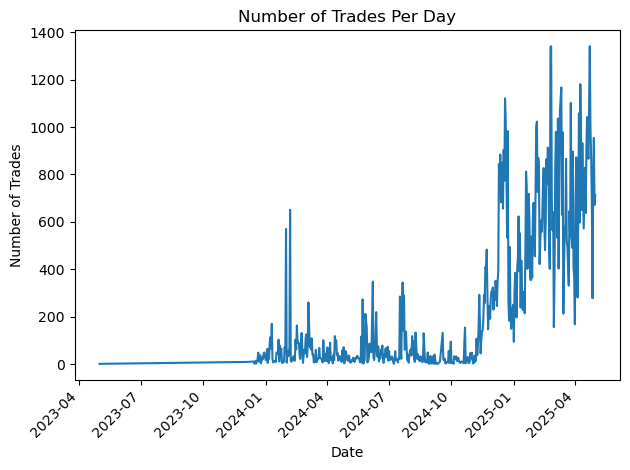

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Count unique trades per day
trades_per_day = Historical_data.groupby('date')['Trade ID'].nunique()

# Plot
plt.figure()
trades_per_day.plot()
plt.title("Number of Trades Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2) Distribution of Trade Size

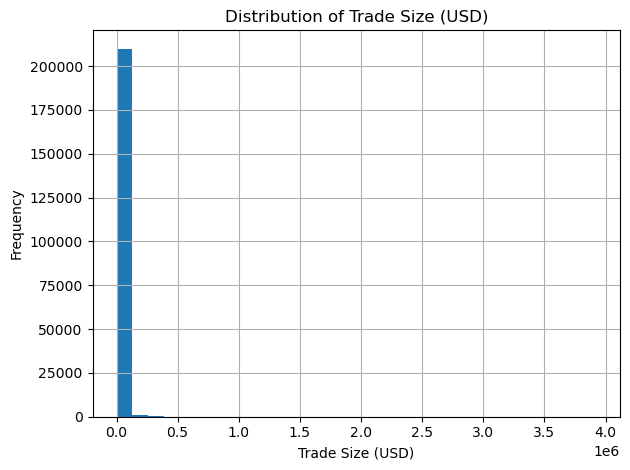

In [79]:
plt.figure()
Historical_data['Size USD'].dropna().hist(bins=30)
plt.title("Distribution of Trade Size (USD)")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
Long vs Short Trade Count

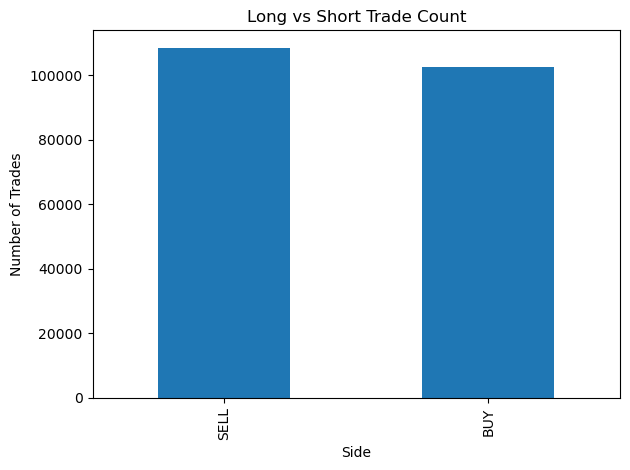

Side
SELL    108528
BUY     102696
Name: count, dtype: int64


In [80]:
side_counts = Historical_data['Side'].value_counts()

plt.figure()
side_counts.plot(kind='bar')
plt.title("Long vs Short Trade Count")
plt.xlabel("Side")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()

print(side_counts)

Part C — “Actionable output” (must-have)

Propose 2 strategy ideas or “rules of thumb” based on your findings. Example: “During Fear days, reduce leverage for segment X; increase trade frequency only for segment Y.”

Strategy 1: Risk Adjustment by Sentiment Regime Observation

Fear periods usually bring higher volatility.

Large position sizes create outsized losses.

Trade size distribution is highly skewed (fat tail risk).

Rule of Thumb :

During Fear days, reduce position size (or leverage proxy) by 25–40%, especially for high-exposure traders.

Implementation Logic :

If:

Sentiment = Fear

Trader belongs to High Exposure segment

Then:

Reduce trade size

Avoid adding to losing positions

Tighten stop-loss rules

Strategy 2: Directional Bias Adjustment by Sentiment Observation

Dataset shows slight short bias overall.

Markets tend to trend upward during Greed regimes.

Rule of Thumb :

During Greed days, increase long bias; during Fear days, allow tactical short exposure but reduce frequency.

Implementation :

If:

Sentiment = Greed
→ Increase long trade allocation
→ Avoid overtrading shorts

If:

Sentiment = Fear
→ Allow short trades
→ But reduce total trade frequency